WINE QUALITY ANALYSIS

In the below analysis I decided to take a closer look at wine data. The dataset is taken from Kaggle here: https://www.kaggle.com/zynicide/wine-reviews The contributor of the dataset was exploring how the wine variety could be predicted from the text of the review. Although it's an interesting topic, I would rather like to look at which variables impact the quality of the wine and whether it can be predicted.

These are the questions that's I'd like to answer:
> 1. Which values of variables signify a higher wine quality? 
> 2. Does higher price correlate with the higher quality of the wine (scored by the users)?
> 3. Can we accurately predict the quality of the wine knowing other variables? 

First let's examine the data. We will combine the two datasets provided in the package.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./winemag-data_first150k.csv')
df = df.append(pd.read_csv('./winemag-data-130k-v2.csv'), ignore_index=True)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [2]:
df.describe()

,Unnamed: 0,points,price
count,280901.000000,280901.000000,258210.000000
mean,70615.705960,88.146934,34.177162
std,41214.379445,3.151528,38.611708
min,0.000000,80.000000,4.000000
25%,35112.000000,86.000000,16.000000
50%,70225.000000,88.000000,25.000000
75%,105337.000000,90.000000,40.000000
max,150929.000000,100.000000,3300.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             280901 non-null  int64  
 1   country                280833 non-null  object 
 2   description            280901 non-null  object 
 3   designation            197701 non-null  object 
 4   points                 280901 non-null  int64  
 5   price                  258210 non-null  float64
 6   province               280833 non-null  object 
 7   region_1               234594 non-null  object 
 8   region_2               111464 non-null  object 
 9   variety                280900 non-null  object 
 10  winery                 280901 non-null  object 
 11  taster_name            103727 non-null  object 
 12  taster_twitter_handle  98758 non-null   object 
 13  title                  129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


So, in the dataset we have an "Unnamed: 0" column which seems to be index. We can drop it. Also  "Description" isn't relevant for this study, personal data also can go out, as well as 'title', because we have it only in the second dataset. We will keep the price , because it should be important in understanding the quality.

In [4]:
df = df.drop(['Unnamed: 0','description', 'taster_name', 'taster_twitter_handle', 'title'], axis=1)

In [5]:
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Now let's check if we have any duplicates and missing data.

In [6]:
df['duplicate'] = df.duplicated(subset=None, keep='first')

In [7]:
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery,duplicate
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,False
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,False
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,False
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,False
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,False


In [8]:
idx = df[df['duplicate'] == True].index
df.drop(idx, inplace=True)

In [9]:
df = df.drop(['duplicate'], axis=1)

In [10]:
(np.sum(df.isnull())/df.shape[0])*100

country         0.036157
designation    29.286170
points          0.000000
price           7.450238
province        0.036157
region_1       16.450336
region_2       60.608178
variety         0.000613
winery          0.000000
dtype: float64

We have two columns with no missing values (points and winery), 7,8% missing values in price (we'll drop these rows to enable predictions, I wouldn't impute here, because we can't ensure that it won't impact prediction quality), and over 60% missing values in region_2. Since region_1 is a more precise location of the winery, we can drop region_2 from the dataset. We will also drop missing rows from province, variety and region_1, the missing values here do not convey an additional meaning.

In [11]:
clean_df = df.dropna(subset=['price','province','variety','region_1'], axis=0)

In [12]:
(np.sum(clean_df.isnull())/clean_df.shape[0])*100

country         0.000000
designation    31.315417
points          0.000000
price           0.000000
province        0.000000
region_1        0.000000
region_2       49.403881
variety         0.000000
winery          0.000000
dtype: float64

So, after dropping missing prices the situation with region_2 hasn't improved much, 'designation' also increased, so it goes out too.

In [13]:
clean_df = clean_df.drop(['region_2', 'designation'], axis=1)

In [14]:
(clean_df.select_dtypes(include=['object']).nunique()/clean_df.shape[0])*100 # % of unique values in each column

country      0.005538
province     0.052215
region_1     1.034011
variety      0.428794
winery      12.393889
dtype: float64

Winery have a high share of unique values in the column, so we won't use them neither in the plots nor for the predictions, because one-hot encoding them will require a lot of power.

In [15]:
clean_df_mini = clean_df.drop(['winery'], axis=1)

Now let's take a closer look at points and price.

array([[<AxesSubplot:title={'center':'points'}>]], dtype=object)

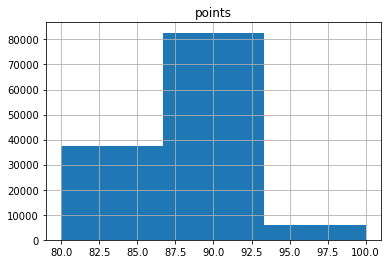

In [16]:
clean_df_mini.hist('points', bins = 3)

In [17]:
clean_df_mini['price'].describe()

count    126401.000000
mean         36.351825
std          41.387406
min           4.000000
25%          18.000000
50%          27.000000
75%          45.000000
max        3300.000000
Name: price, dtype: float64

The quality score points span from 80 to 100. Let's create a categorical column based on 3 quality bins. We will also define 4 price ranges for future analysis.

In [18]:
def estimate_quality(value):
    if 80 <= value < 87:
        return 'low'
    elif 87 <= value < 93:
        return 'average'
    elif value >= 93:
        return 'high'
    return 'other'

clean_df_mini['quality'] = clean_df_mini['points'].apply(estimate_quality)

In [19]:
def estimate_price(value):
    if value < 16:
        return 'low'
    elif 16 <= value < 25:
        return 'average'
    elif 25 <= value < 41:
        return 'high'
    elif value >= 41:
        return 'highest'
    return 'other'

clean_df_mini['price_range'] = clean_df_mini['price'].apply(estimate_price)

Now we will group and plot other categories and look at the average price and corresponding quality of wines for the top  10 category members.

First we'd like to check how many unique members we have in each categorical column. Too many unique members would make the finding for that column insignificant, so we shouldn't analyse them for generic trends.

In [20]:
clean_df_mini['counts'] = 1 #create a counter for plots

In [21]:
def check_col(col):
    
    quality = clean_df_mini.groupby([col], as_index=False).agg({'points': 'mean'})
    quality = quality.sort_values(by = ['points'], ascending=False)
    
    mean_pq = clean_df_mini.groupby([col,'price_range','quality'], as_index=False).agg({'price':'median', 'counts': 'sum'})
    mean_pq = mean_pq[mean_pq['price_range'].isin(['highest', 'high'])]
    mean_pq_total = mean_pq.groupby([col]).agg({'counts': 'sum'}).rename(columns={'counts': 'total'})
    mean_pq = mean_pq.join(mean_pq_total, on=col)
    mean_pq['percent'] = (mean_pq['counts']/mean_pq['total'])*100
    mean_pq = mean_pq.sort_values(by = ['price'], ascending=False)
    
    mean_qp = clean_df_mini.groupby([col,'price_range','quality'], as_index=False).agg({'points':'mean', 'counts': 'sum'})
    mean_qp = mean_qp[mean_qp['quality']=='high']
    mean_qp_total = mean_qp.groupby([col]).agg({'counts': 'sum'}).rename(columns={'counts': 'total'})
    mean_qp = mean_qp.join(mean_qp_total, on=col)
    mean_qp['percent'] = (mean_qp['counts']/mean_qp['total'])*100
    mean_qp = mean_qp.sort_values(by = ['points'], ascending=False)

    # Stacked percentage bar chart to show the proportion of high-price wines in different quality categories for the selected category column.
    plt.figure(figsize=(5, 4))
    sns.histplot(x=col, 
                weights='percent', 
                hue='quality',
                multiple='stack',
                data=mean_pq)
    plt.xticks(rotation=90)
    plt.ylabel("% of High Price Wines", size=14)
    plt.xlabel('{0}'.format(col), size=14)
    plt.xlim(-0.5, 4.5)
    plt.title('Top 5 {0} for high-priced wines by quality'.format(col), size=18)

    # Stacked percentage bar chart to show the proportion of high-quality wines in different price ranges for the selected category column.
    plt.figure(figsize=(5, 4))
    sns.histplot(x=col, 
                weights='percent', 
                hue='price_range',
                multiple='stack',
                data=mean_qp)
    plt.xticks(rotation=90)
    plt.ylabel("% of High Quality Wines", size=14)
    plt.xlabel('{0}'.format(col), size=14)
    plt.xlim(-0.5, 4.5)
    plt.title('Top 5 {0} for high-quality wines by price range'.format(col), size=18)
    
    # Bar chart showing mean wine quality (descending) by selected category.
    plt.figure(figsize=(5, 4))
    sns.barplot(x=col, 
                y='points', 
                data=quality)
    plt.xticks(rotation=90)
    plt.ylabel("Wine Quality", size=14)
    plt.xlabel('{0}'.format(col), size=14)
    plt.xlim(-0.5, 4.5)
    plt.ylim(80, None)
    plt.title('Top 5 {0} by wine quality'.format(col), size=18)

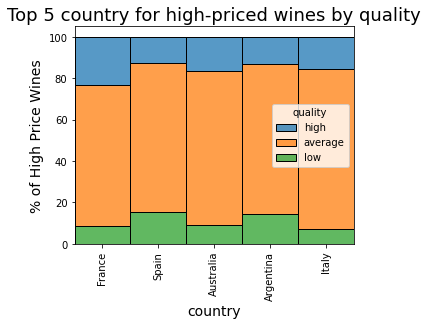

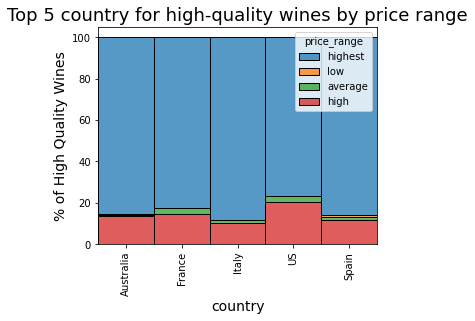

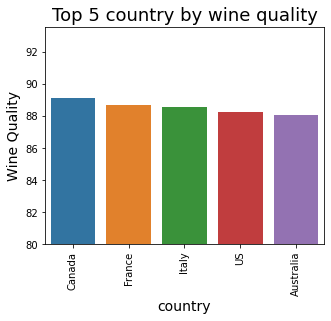

In [22]:
check_col('country')

Interesting observation here, high quality means high price, but high price does not necessarily mean high quality on the country level. In fact, most of the highly priced wines are of average quality.

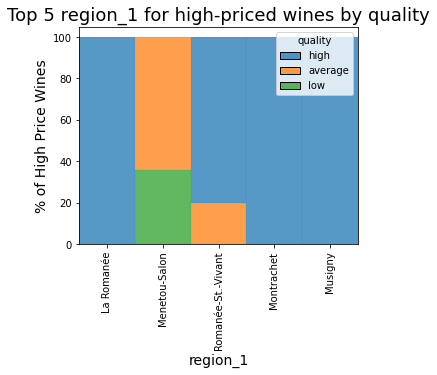

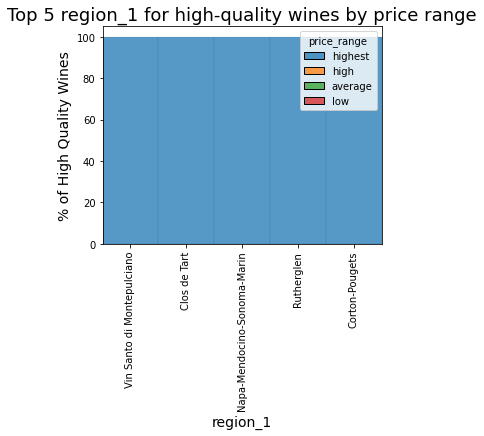

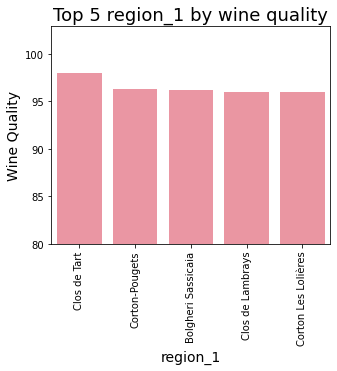

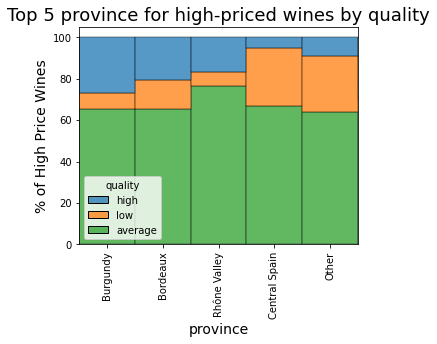

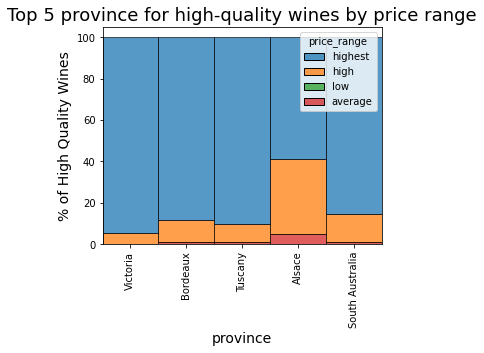

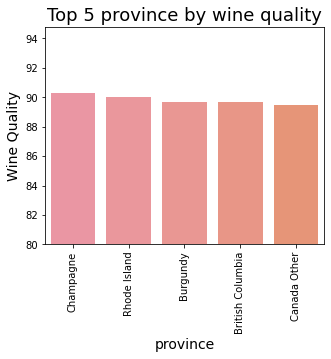

In [23]:
check_col('region_1')
check_col('province')

On the region level there is a positive correlation between price and points both ways (high price means high quality, high quality means high price), province, however, falls in the pattern of country.

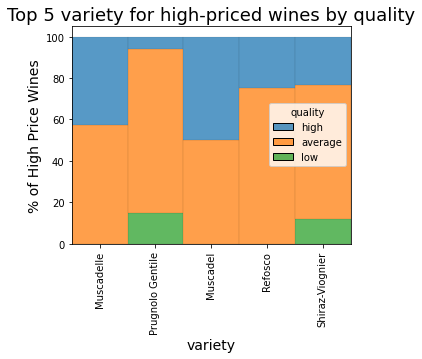

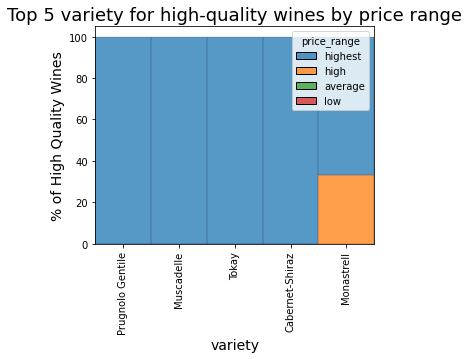

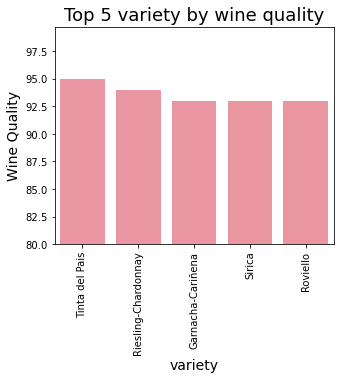

In [24]:
check_col('variety')

Variety rather follows the pattern of region, than of country and province. Highly priced wines balance in the high and average quality, whereas high quality definitely means high price.

In [25]:
clean_df_mini = clean_df_mini.drop(['counts','quality','price_range'], axis=1) #drop additional columns we don't need anymore

Now that we have a good understanding of the data, let's attempt to predict the quality. First we need to dummy the categorical variables, all numerical variables are already filled.

In [26]:
clean_df_mini.head() #check what remains in the data

,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,Provence red blend


In [27]:
def clean_data_points(data):
    y = data['points']
    
    #Drop price column for the future X 
    data = data.drop(['points'], axis=1)
        
    # Dummy the categorical variables
    cat_vars = data.select_dtypes(include=['object']).copy().columns
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        data = pd.concat([data.drop(var, axis=1), pd.get_dummies(data[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)
    
    X = data
    return X, y
    
#Use the function to create X and y
X, y = clean_data_points(clean_df_mini)  

I tried Linear Regression, AdaBoost, Random Forest with AdaBoost and Random Forest alone, below is the best model of the lot.

In [28]:
def rf_model(test_size, n_est):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = n_est, random_state = 42)
    regressor.fit(X_train, y_train)

    y_test_preds_rf = regressor.predict(X_test)
    y_train_preds_rf = regressor.predict(X_train)

    test_score_rf = r2_score(y_test, y_test_preds_rf)
    train_score_rf = r2_score(y_train, y_train_preds_rf)
    
    return test_score_rf, train_score_rf, regressor
  

In [29]:
test_score_rf, train_score_rf, regressor = rf_model(0.1, 150)

In [30]:
print('train score: {0:.3g}'.format(train_score_rf))
print('test score: {0:.3g}'.format(test_score_rf))

train score: 0.645
test score: 0.406


The train and especially test scores aren't great, although it's the best result I achieved in comparison with other models. I would like to check if the features are important for quality. I will try LabelEncoder instead of get_dummies, this also should improve the speed of RF. Then I can also bring winery back to see if it helps. Label-encoded columns will not require as much compute for RF, as one-hot encoded.

In [31]:
clean_df.head()

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [32]:
def create_labels(data):
    from sklearn.preprocessing import LabelEncoder
    labels = LabelEncoder()
    y = data['points']
    data = data.drop(['points'], axis=1)
    cat_vars = data.select_dtypes(include=['object']).copy().columns
    for var in cat_vars:
        data[var] = labels.fit_transform(data[var].astype(str))
    X = data
    return X, y

In [33]:
X,y = create_labels(clean_df)

In [34]:
test_score_rf, train_score_rf, regressor = rf_model(0.1, 150)
print('train score: {0:.3g}'.format(train_score_rf))
print('test score: {0:.3g}'.format(test_score_rf))

train score: 0.852
test score: 0.434


In [37]:
important_features = pd.Series(data=regressor.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

price       0.467927
winery      0.267073
region_1    0.111738
variety     0.096367
province    0.041278
country     0.015617
dtype: float64


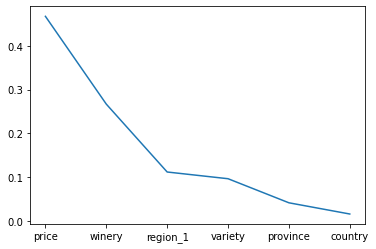

In [38]:
plt.plot(important_features.index, important_features)
plt.show()

Winery is rather important, so it's good we brought it back.  Let's drop province and country as least important and see if it works any better with LabelEncoder.

In [39]:
X = X.drop(['country', 'province'], axis=1) 
test_score_rf, train_score_rf, regressor = rf_model(0.1, 150)
print('train score: {0:.3g}'.format(train_score_rf))
print('test score: {0:.3g}'.format(test_score_rf))

train score: 0.85
test score: 0.428


This is actually worse. Will try GridSearch before giving up. The model probably needs more significant features to run successfully.

In [40]:
X,y = create_labels(clean_df)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

grid = {'bootstrap': [True, False],
 'max_depth': [2, 4, 10, 16, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 10, 15, 50, 100, 150, 200, 400, 600]}

rf_search = RandomForestRegressor()
rf_search_model = RandomizedSearchCV(estimator = rf_search, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

rf_search_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END bootstrap=True, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.7s
[CV] END bootstrap=True, max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.5s
[CV] END bootstrap=False, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  18.5s
[CV] END bootstrap=False, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  18.7s
[CV] END bootstrap=False, max_depth=16, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  18.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=15; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=15; total time=   1.

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 10, 16, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 10, 15, 50, 100,
                                                         150, 200, 400, 600]},
                   random_state=42, verbose=2)

In [42]:
rf_search_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 16,
 'bootstrap': True}

These parameters are different from what I had previously, I will try them in RF.

In [43]:
regressor = RandomForestRegressor(n_estimators = 400, min_samples_split = 5, min_samples_leaf = 1, max_depth = 16, bootstrap = True, random_state = 42)
regressor.fit(X_train, y_train)

y_test_preds_rf = regressor.predict(X_test)
y_train_preds_rf = regressor.predict(X_train)

test_score_rf = r2_score(y_test, y_test_preds_rf)
train_score_rf = r2_score(y_train, y_train_preds_rf)

print('train score: {0:.3g}'.format(train_score_rf))
print('test score: {0:.3g}'.format(test_score_rf))

train score: 0.61
test score: 0.467


Well, the train score is worse, but the test score is the best I had, so I'll leave it at that. My guess is that the dataset lacks significant features, so it may not be possible to achieve higher accuracy on quality estimate with the data we have. 